# Lecture 14:  Solutions to Ordinary Differential Equations and Viscoelasticity

### Sections

* [Introduction](#Introduction)
* [Learning Goals](#Learning-Goals)
* [On Your Own](#On-Your-Own)
    * First Order ODE: DC Circuit
    * First Order ODE: Skydiving
* [In Class](#In-Class)
    * Introduction to `dsolve`
    * Maxwell Model:  Constant Stress
    * Maxwell Model:  Constant Strain
    * Kelvin Model:  Constant Stress
* [Homework](#Homework)
* [Summary](#Summary)
* [Looking Ahead](#Looking-Ahead)
* [Reading Assignments and Practice](#Reading-Assignments-and-Practice)

### Introduction
----

The content in the Introduction is modified from an online lecture from [David Balmer](http://www.homepages.ed.ac.uk/johnc/teaching/fluidmechanics4/2003-04/visco/index.html).

The spring obeys Hooke's law: $ \sigma=M\epsilon $.

The dashpot obeys: $ \sigma = \eta \frac{d \epsilon}{dt} $

In this lecture we will discuss the Maxwell model and the Kelvin model of viscoelastic materials.  Combinations of springs and dashpots can provide insight into materials behavior.  Combining many such Maxwell and Kelvin models can give insight into the spectrum of dynamic mechanical behavior seen in polymer systems.

Our first assumption is that for a spring and a dashpot in series that the stress is equally carried by each member in the load train and that the strain is a sum of strains in each element.  This is stated as:  

$$ \epsilon_{total} = \epsilon_s + \epsilon_d $$

Taking the time derivative for each term produces:  

$$ \frac{d\epsilon_{\mathrm{total}}}{dt} = \frac{d\epsilon_s}{dt} + \frac{d\epsilon_d}{dt} $$

We assume that the spring response is instantaneous so that we can write:  

$$\frac{d\sigma}{dt} = M\frac{d\epsilon}{dt}  $$

Using the condition that the stresses are the same reduces the number of variables by one.  Using the condition that the strains add up to the total strain results in:

$$ \epsilon(t) = M \frac{d \sigma(t)}{dt} + \frac{\sigma(t)}{\eta}$$

Don't forget that both stress and strain are functions of time. 

[Top of Page](#Sections)

### Learning Goals
----

* Learn how to solve ODEs using a CAS such as `Sympy`
* Use `SciPy`'s functionality to solve an ODE
* Apply these methods to problems of viscoelasticity

[Top of Page](#Sections)

### On Your Own
----

#### First Order ODE: DC Circuit

A simple DC circuit includes a switch (initially open), an inductor (L=2) and a resistor (R=6) in series.  The DC voltage is 100V.  What is the current in the circuit after the switch is closed?  We know that:

$$ E_L + E_R = 100V $$

and that 

$$ E_L = L \frac{dI(t)}{dt} $$

and 

$$ E_R = RI(t) $$  

(You will see a strong correlation between these problems and viscoelastic problems later in this lecture.)  Normally one would solve this problem by separation of variables.  In `sympy` there is a function called `dsolve()` that can help us with this.  Let us import `sympy` into the current namespace in a way that helps us keep track of what functions are coming from `sympy`.

In [1]:
%matplotlib notebook
from sympy import *

This will set up some common symbols and report back to you what it has done.

In [2]:
init_session()

IPython console for SymPy 1.0 (Python 2.7.13-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


We create symbols that are a bit easier to remember in this problem

In [3]:
current, voltage = symbols('current voltage', cls=Function)

We assign to the variable `equationToSolve` the equation we are going to pass to `dsolve()`.  At this point I have to say that Mathematica is really way more advanced than `sympy`.  If you find yourself really doing some heavy computing you may want to default to numerical methods if you are desperate to stay with Python or consider switching to Mathematica to do symbolic calculations.  I'm really caught between two worlds on this one.

In [ ]:
?Eq

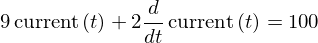

In [4]:
equationToSolve = Eq(2*current(t).diff(t) + 9*current(t), 100)
equationToSolve

Here we solve the equation.

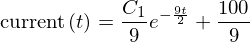

In [5]:
solutionToEquation = dsolve(equationToSolve, current(t))
solutionToEquation

Unfortunately, when we use `dsolve()` the integration constants are not automatically created for us.

In [6]:
var('C1 C2')

We substitute the initial condition and then solve for C1.  Afterwards we substitute C1 back into the general solution and plot the result.

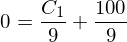

In [7]:
particularSolution = solutionToEquation.subs([(current(t),0),(t,0)])
particularSolution

In [8]:
solutionSet = solveset(particularSolution,C1)
solutionList = [a for a in solutionSet]
solutionSet

<IPython.core.display.Javascript object>


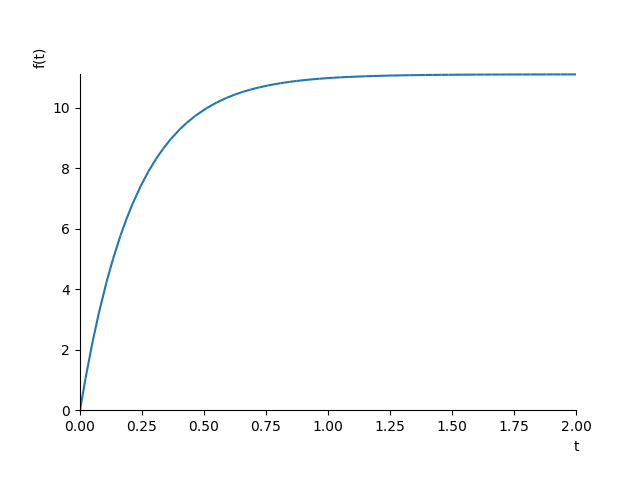

In [9]:
plot(solutionToEquation.subs(C1,-100).rhs,(t,0,2));

This time with no substitutions.

In [ ]:
L, R, t, V0 = symbols('L R t V0', positive=True)
A, V = symbols('A V', cls=Function)

rLCircuit = A(t).diff(t) + (R/L)*A(t) - V(t)
rLCircuit

solution = dsolve(rLCircuit, A(t))
solution

In [ ]:
particularSolution = dsolve(rLCircuit, A(t)).subs([(A(t),0),(t,0),(V(t),V0)]).doit()
particularSolution

`solveset` returns a set object.  When the set is a `FiniteSet` we can convert to a list and de-reference the list as I've done here.  Not sure this is good practice, in general.  So - I would only do this in an interactive session when I can inspect the return value.  I would not write library code like this.

In [ ]:
const1 = -L*V0/R

In [ ]:
simplify(solution.subs([(C1,const1),(V(t),V0)]).doit())

[Top of Page](#Sections)

#### First Order ODE: Skydiving

This example is taking from Arfken's book.  Example problem 7.2.1.  The model describes a falling skydiver under a parachute.  We are trying to find the velocity profile as a function of time as well as the terminal velocity.  The equation of motion is:

$$ m \dot{v} = m g - b v^2 $$

where v is $v(t)$, a function of time.  Later in the problem we will provide values for $m$, $g$, and $b$ to find a particular solution.

In [ ]:
from sympy import *
init_session()

In [ ]:
mass, g, b, t = symbols('mass g b t', real=True)
v = symbols('v', cls=Function)

paraChute = mass*v(t).diff(t)-mass*g+b*(v(t))**2
paraChute

In [ ]:
solution = dsolve(paraChute,v(t),hint='lie_group')
solution

In [ ]:
particularSolution = solution.subs([(v(t),0),(t,0)])
particularSolution

In [ ]:
C1 = symbols('C1')

const = solve(particularSolution, C1)
const

In [ ]:
final_solution = (solution.subs(C1,const[1]).rhs).expand().simplify()
final_solution

We need to think a bit about our identities.

In [ ]:
1/tanh(t - I*pi/2).expand(complex=True)

In [ ]:
1/tanh(t - I*pi/2).expand(complex=True).simplify()

Now we can substitute and plot the solution.

In [ ]:
%matplotlib notebook

plot(final_solution.subs([(g,9.8),(mass,70000),(b,700000)]),(t,0,2))

Numpy and SciPy give us the ability to do this work numerically, too.

In [ ]:
%matplotlib notebook

from scipy.integrate import odeint  # for integrate.odeint
from pylab import *  # for plotting commands

def deriv(velocity,time):
    mass = 70000.
    drag = 700000.
    gravity = 9.8
    dvdt = gravity-(drag/mass)*velocity**2
    return array(dvdt)

time = linspace(0.0,1.0,1000)
yinit = array([0.0])  # initial values
y = odeint(deriv,yinit,time)

figure()
plot(time, y[:,0])
xlabel('t')
ylabel('y')
show()

[Top of Page](#Sections)

#### DIY:  Nonseparable Exact ODE

Solve the following differential equation and plot the family of solutions for different constants:

$$
\frac{d f(x)}{dx} + \frac{1 + f(x)}{x} = 0
$$

In [ ]:
# your dsolve code goes here!

In [ ]:
# it is good practice to put your solution back into the differential equation to check the results.

In [ ]:
# your plotting code goes here!

[Top of Page](#Sections)

#### RL Circuit with Forcing

Solve Example 7.2.5 from Arfken.  Assume that $I(t=0) = 0$.  Find the solution first, then allow $V(t) = V0$ (a constant).  While we won't do it here, you could let $V(t)$ be a function like $V0 \sin(\omega t)$.

In [ ]:
%matplotlib notebook
from sympy import *
init_printing()

In [ ]:
L, R, t = symbols('L R t')
A, V = symbols('A V', cls=Function)

In [ ]:
rLCircuit = L*A(t).diff(t) + R*A(t) - V(t)
rLCircuit

In [ ]:
var('V0')

In [ ]:
rLCircuit_constantV = rLCircuit.subs(V(t),V0)
rLCircuit_constantV

In [ ]:
solution = dsolve(rLCircuit_constantV, A(t))
solution

In [ ]:
solution_with_ics = solution.subs([(A(t),0),(t,0)])
solution_with_ics

In [ ]:
var('C1')
const = solve(solution_with_ics,C1)[0]

In [ ]:
particularSolution = solution.subs(C1, const).simplify()
particularSolution

Redo this with interact?

In [ ]:
plot(particularSolution.subs([(R,20),(V0,10),(L,2)]).rhs,(t,0,10))

[Top of Page](#Sections)

### In Class
----

#### Using `dsolve` in an Organized Way

In [ ]:
import sympy as sp
sp.init_printing()

The `dsolve` documentation can be found [here](http://docs.sympy.org/dev/modules/solvers/ode.html) and covers the types of equations that can be solved currently.  In a simple case the function `dsolve` is called/used by supplying the differental equation of interest and the function for which the solution is desired.  The results are then used in subsequent calculations to determine the constants in the problem.  We will use the examples below to reinforce this simple view of differential equation solving.  

My recommendation for developing your solutions is as follows:

* express the equation/model you are interested in solving in the most general format
* substitute any known functional relationships that can eliminate unknown terms or derivatives
* call `dsolve` to find the general solution for your model
* substitute initial conditions into the results to determine the constants
* substitute the constants into the general solution to get your particular solution
* functionalize the results and visualize the results in a plot (if appropriate)
* use `interact` to permit exploration of free parameters and continue to develop an intuititve understanding of your model

In [ ]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
f = Function('f')

In [ ]:
modelToSolve = sp.Eq(Derivative(f(x), x, x) + 9*f(x),0)
modelToSolve

In [ ]:
generalSolution = dsolve(modelToSolve, f(x))
generalSolution

There are other ways to specify the derivative.

In [ ]:
dsolve(sp.diff(f(x),x,2) + 9*f(x), f(x))

#### Models of Viscoelastic Behavior:  Maxwell Model - Constant Stress

The physical experiment is one where we apply a constant stress to the Maxwell model.  The model responds by setting the stress in every element as constant and the strain is the sum of the individual strains.  The thought experiment is as follows:

* A stress is applied to the series (chain) of elements at rest
* The spring responds by Hooke's law instantaneously
* The dashpot is unresponsive at $t=0$
* From $t>0$ the spring's strain is fixed but the dashpot begins to strain
* There is no limit on how far the dashpot can extend
* A good exercise is to sketch a diagram of these steps

![](./images/Maxwell_diagram.png)

We begin by setting up our environment.  We import `interact` and `fixed` to help us plot and visualize the results of our computation.

In [ ]:
%matplotlib notebook
from ipywidgets import interact, fixed
import sympy as sp

In [ ]:
sp.init_session()
sp.var('omega sigma epsilon eta M sigma0 C1 C2')

The Maxwell model is defined as follows:

In [ ]:
maxwellModel = Eq(epsilon(t).diff(t), sigma(t).diff(t)/M + sigma(t)/eta)
maxwellModel

First we will work out the solution for a constant applied stress, $\sigma_0$.  We start with the general solution and make the substitution that $\sigma(t)$ is constant by changing the symbol from a function of `t` to $\sigma_0$.

In [ ]:
generalSolution = dsolve(maxwellModel,epsilon(t))
generalSolution

In [ ]:
constantStressSolution = dsolve(maxwellModel,epsilon(t)).subs(sigma(t),sigma0).doit()
constantStressSolution

We know that at $t=0$ in this system, Hooke's law defines the strain at $t=0$.

In [ ]:
constantStressSolution.subs([(epsilon(t),sigma0/M),(t,0)])

In [ ]:
solutionToPlot = constantStressSolution.subs(C1,sigma0/M).rhs
solutionToPlot

Now we can plot the solution with appropriate substitutions for the two parameters and one constant.  We extract the RHS and use `subs` and `ipywidgets` to interactively plot the solution.  Alternatively you could `lambdafy` the solution and use `numpy` to develop the interactive plot (you might be more satisfied with the results).

In [ ]:
def plotSolution(eta0,M0):
    plot(solutionToPlot.subs([(eta,eta0),(M,M0),(sigma0,100)]),
         (t,0,5),
         #ylim=(0,1000),
         xlabel='time',
         ylabel=r'$\epsilon(t)$'
        )
    
interact(plotSolution,eta0=(1,100,1),M0=(1,100,1));

The major takeawy here is that strain rises linearly with time.

[Top of Page](#Sections)

#### Models of Viscoelastic Behavior:  Maxwell Model - Constant Strain

Set this as a DIY.

Because the strain is constant the time rate of change is zero and we can make ths substitution right from the start.

In [ ]:
%matplotlib inline
from sympy import *
init_session()

In [ ]:
var('epsilon, t, sigma, M, eta, epsilon0, sigma0')

We still have our maxwellModel defined from a previous computation:

In [ ]:
maxwellModel = Eq(epsilon(t).diff(t), sigma(t).diff(t)/M + sigma(t)/eta)
maxwellModel

In [ ]:
constantStrainModel = maxwellModel.subs(diff(epsilon(t),t),0)
constantStrainModel

In [ ]:
solutionToConstantStrainModel1 = dsolve(constantStrainModel.rhs,sigma(t))
solutionToConstantStrainModel1

In [ ]:
dsolve(maxwellModel,sigma(t)).subs(epsilon(t),0).doit()

In [ ]:
solutionToConstantStrainModel2 = dsolve(maxwellModel,sigma(t))
solution = solutionToConstantStrainModel2.subs(epsilon(t),0).doit()
solution

In [ ]:
var('C1')

In [ ]:
solution.subs([(t,0),(sigma(0),sigma0)])

Now we make the final substitutions and get our final equation:

In [ ]:
solution.subs([(C1,sigma0)])

What does this say?  We apply an initial stress at time zero.  The material strains to whatever is predicted by Hooke's law.  And then, without changing the strain again through the experiment, the stress drops exponentially.

In [ ]:
solutionToPlot = solution.subs([(C1,sigma0)]).rhs
solutionToPlot

Functionalize and plot the results.

In [ ]:
from ipywidgets import *

def plotSolution(M0, eta0):
    plot(solutionToPlot.subs([(M,M0),(eta,eta0),(sigma0,100)]),
         (t,0,5),
         ylim=(0,100),
         xlabel='time',
         ylabel=r'$\sigma(t)$'
        )
    
interact(plotSolution,M0=(1,100,1),eta0=(1,100,1));

[Top of Page](#Sections)

#### Models of Viscoelastic Behavior:  Kelvin Model - Constant Stress

![](./images/Kelvin_Voigt_diagram.png)

Following similar logic as above, except this time the strains are all taken to be the same and the stresses are additive.

In [ ]:
%matplotlib inline
from sympy import *
init_session()

In [ ]:
var('epsilon, t, sigma, M, eta, epsilon0, sigma0')

In [ ]:
kelvinModel = Eq(sigma(t),M*epsilon(t)+eta*epsilon(t).diff(t))
kelvinModel

In this problem we will let stress be a constant for all time:

$$ \sigma(t) = \sigma_0 $$

Making the substitution:

In [ ]:
kelvinModelConstantStress = kelvinModel.subs(sigma(t),sigma0)
kelvinModelConstantStress

In [ ]:
kelvinModelSolution = dsolve(kelvinModelConstantStress,epsilon(t))
kelvinModelSolution

In [ ]:
equationToSolveForC = kelvinModelSolution.subs([(epsilon(t),0),(t,0)])
equationToSolveForC.doit()

In [ ]:
var('C1')

In [ ]:
solve(equationToSolveForC.rhs,C1)

In [ ]:
kelvinModelSolution.subs(C1,eta/M*log(-sigma0)).collect(sigma0,)

Plot this for yourself!  Switch to Numpy plotting for performance improvements.

[Top of Page](#Sections)

# In Class Activities

In this section I pose two important differential equation forms that result from the decomposition of Fick's Law.  As stated above, the steps to follow are:

* express the equation/model you are interested in solving in the most general format
* substitute any known functional relationships that can eliminate unknown terms or derivatives
* call `dsolve` to find the general solution for your model
* substitute initial conditions into the results to determine the constants
* substitute the constants into the general solution to get your particular solution
* functionalize the results and visualize the results in a plot (if appropriate)
* use `interact` to permit exploration of free parameters and continue to develop an intuititve understanding of your model

I'll help you get started by writing down the first model equation to solve:

In [1]:
%matplotlib notebook
import sympy as sp
import numpy as np
from ipywidgets import interact, fixed
sp.init_printing()

In [2]:
x, t = sp.symbols('x t')
k, alpha = sp.symbols('k alpha', positive=True)

This is the first ODE of interest:

$$
\frac{d x(t)}{dt } \frac{1}{\alpha x(t)} + k = 0
$$

Solve this ODE with boundary conditions: $x(t) = 1$ at $t = 0$ and $x(t) = 0$ as $t \rightarrow \infty$.

In [3]:
firstModelToSolve = x(t).diff(t)/(x(t)*alpha) + k
functionWeAreLookingFor = x(t)

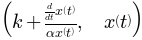

In [4]:
firstModelToSolve, functionWeAreLookingFor

In [20]:
hintList = sp.classify_ode(firstModelToSolve)
hintList

('separable',
 '1st_exact',
 '1st_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_homogeneous',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral')

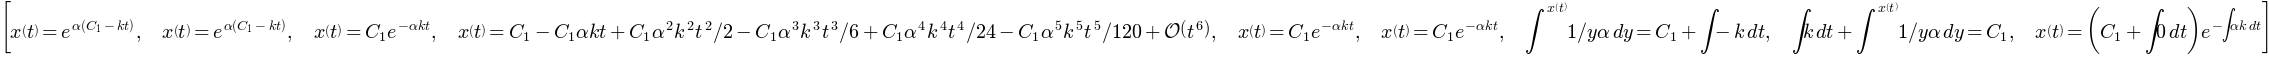

In [31]:
solutionList = [sp.dsolve(firstModelToSolve, functionWeAreLookingFor, hint=hint) for hint in hintList]
solutionList

In [34]:
solutionToFirstModel = sp.dsolve(firstModelToSolve, functionWeAreLookingFor, hint=hintList[2])
solutionToFirstModel

<IPython.core.display.Javascript object>


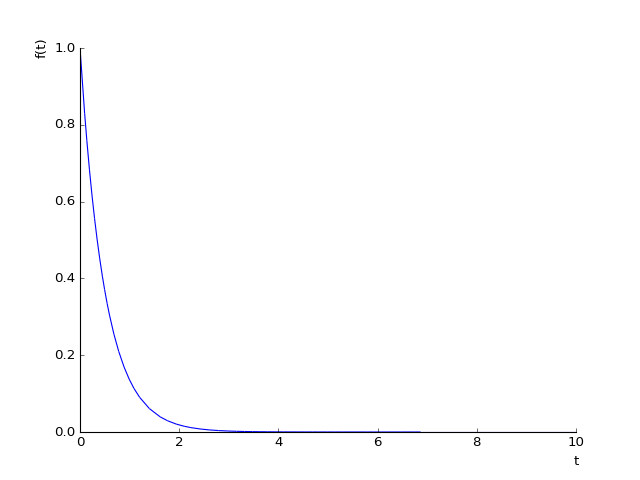

In [35]:
sp.var('C1'), solutionToFirstModel.subs([(C1,1)])
sp.plot(sp.exp(-2*t),(t,0,10));

This is the other ODE of interest:

$$
\frac{d^2 x(t)}{dt^2} \frac{1}{x(t)} + k = 0
$$

Solve this ODE with boundary conditions:

$$
x(t) = 0
$$

at $t = 0$ and $t = 2\pi$

In [38]:
# 0

%matplotlib notebook
import sympy as sp
import numpy as np
from ipywidgets import interact, fixed
sp.init_printing()
x, t = sp.symbols('x t')
k, alpha = sp.symbols('k alpha', positive=True)

sp.diff(sp.diff(x(t))) == x(t).diff(t,2) == x(t).diff(t).diff(t)

True

In [44]:
# 1

(x*k).subs(k,2).subs(x,3) == (x*k).subs([(k,2),(x,3)])

True

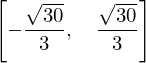

In [55]:
# 2

polyEquation = sp.Eq(3*x**2 - 2,8)
sp.solve(polyEquation,x)

In [36]:
secondModelToSolve = x(t).diff(t,2)/x(t) + k**2
sp.var('C1 C2')
solutionToSecondModel = sp.dsolve(secondModelToSolve).subs(C2,0)
solutionToSecondModel

### Homework
----

#### Solve the Maxwell model for a time varying stress.

Siolve the Maxwell model for a time varying stress.  Solve in `sympy` and plot with `numpy` (you'll get better plotting performance.  You will be graded on your solution as well as your visualization and written response.  Choose a forcing function such as:

$$\sigma(t) = \sigma_0 \sin(\omega t)$$

for this problem.

In [ ]:
# your code goes here.

[Top of Page](#Sections)

### Looking Ahead
----

[Top of Page](#Sections)

### Reading Assignments and Practice
----

[Top of Page](#Sections)